In [ ]:

import pandas as pd
import json
from datetime import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.api import OLS
import statsmodels.api as sm
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller, grangercausalitytests
from pandas.tseries.offsets import QuarterEnd


charging_station_data = pd.read_csv('data/charging_station_data.tsv', sep='\t', encoding='ISO-8859-1')

charging_cols = [
	# unique identifiers
	'id',
	'station_name',

	# associate using date
	'open_date',

	# associate using location
	'country',
	'state',
	# 'city',

	# filter using status
	'status_code',
]

policy_data = pd.read_csv('data/transportation_policy_data.tsv', sep='\t', encoding='ISO-8859-1')

policy_cols = [
	# unique identifiers
	'id',
	'title',

	# associate using date
	'significant_update_date',

	# associate using location
	'state',

	# categorization
	'type',
	'categories'
]

parsed_date_col = 'parsed_date'



In [ ]:
def null_filtered(data, cols):
    mask = 1
    for col in cols:
        # mask &= data[col].notnull()
        mask &= (data[col].ne('None'))
    return data[mask].reset_index()

def filter_invalid(data, col_name):
  mask = 1
  mask &= (data[col_name].ne('US'))
  mask &= (data[col_name].ne('CA'))
  return data[mask].reset_index()



def get_formatted_date(data_slice, date_col, format: str):
    formatted_dates = []
    for date_str in data_slice[date_col]:
        # Check if the date string is valid
        if date_str and date_str != 'None':
            try:
                # Parse the date
                formatted_date = dt.strptime(date_str, format)
                formatted_dates.append(formatted_date)
            except ValueError:
                # Handle invalid date strings
                formatted_dates.append(None)
        else:
            # Handle None or empty values
            formatted_dates.append(None)
    return formatted_dates



In [ ]:
charging_station_data = null_filtered(charging_station_data, charging_cols)[charging_cols]
charging_station_data = filter_invalid(charging_station_data, 'open_date')

In [ ]:
charging_station_data[parsed_date_col] = get_formatted_date(
    charging_station_data,
    'open_date',
    '%Y-%m-%d'
)

In [ ]:
policy_data = null_filtered(policy_data, policy_cols)[policy_cols]
policy_data = filter_invalid(policy_data, 'significant_update_date')

In [ ]:
policy_data[parsed_date_col] = get_formatted_date(
    policy_data,
    'significant_update_date',
    '%m/%d/%Y'
)


ADF Statistic: -1.28229317257421
p-value: 0.6372337756955083

Granger Causality Tests:

Granger Causality test for Incentives:

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0176  , p=0.8953  , df_denom=33, df_num=1
ssr based chi2 test:   chi2=0.0192  , p=0.8898  , df=1
likelihood ratio test: chi2=0.0192  , p=0.8898  , df=1
parameter F test:         F=0.0176  , p=0.8953  , df_denom=33, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.0129  , p=0.9871  , df_denom=30, df_num=2
ssr based chi2 test:   chi2=0.0302  , p=0.9850  , df=2
likelihood ratio test: chi2=0.0302  , p=0.9850  , df=2
parameter F test:         F=0.0129  , p=0.9871  , df_denom=30, df_num=2

Granger Causality test for Laws and Regulations:

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.4707  , p=0.4975  , df_denom=33, df_num=1
ssr based chi2 test:   chi2=0.5135  , p=0.4736  , df=1
likelihood ratio test: chi2=0.5099  , p=0.4752  , 

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


ssr based F test:         F=0.6406  , p=0.4292  , df_denom=33, df_num=1
ssr based chi2 test:   chi2=0.6988  , p=0.4032  , df=1
likelihood ratio test: chi2=0.6921  , p=0.4054  , df=1
parameter F test:         F=0.6406  , p=0.4292  , df_denom=33, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.2999  , p=0.7431  , df_denom=30, df_num=2
ssr based chi2 test:   chi2=0.6998  , p=0.7048  , df=2
likelihood ratio test: chi2=0.6929  , p=0.7072  , df=2
parameter F test:         F=0.2999  , p=0.7431  , df_denom=30, df_num=2

Granger Causality test for Utility / Private Incentives:

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0004  , p=0.9833  , df_denom=33, df_num=1
ssr based chi2 test:   chi2=0.0005  , p=0.9825  , df=1
likelihood ratio test: chi2=0.0005  , p=0.9825  , df=1
parameter F test:         F=0.0004  , p=0.9833  , df_denom=33, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.0969  , p=0.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


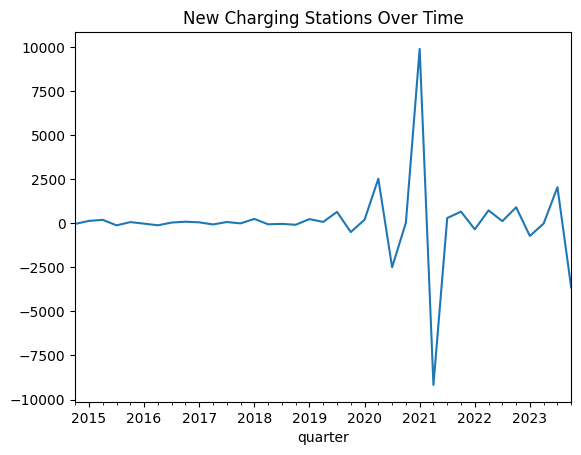

In [ ]:
charging_station_data['quarter'] = pd.to_datetime(charging_station_data['open_date']).dt.to_period('Q')
policy_data['quarter'] = pd.to_datetime(policy_data['significant_update_date']).dt.to_period('Q')

# Aggregate charging station data by quarter
charging_by_quarter = charging_station_data.groupby('quarter').size().rename('new_stations')

# Aggregate policy data by quarter and type
policy_by_quarter = policy_data.groupby(['quarter', 'type']).size().unstack(fill_value=0)

# Merge the two datasets
merged_data = pd.merge(charging_by_quarter, policy_by_quarter, left_index=True, right_index=True, how='inner')

merged_data.dropna(inplace=True)

stationarity_results = adfuller(merged_data['new_stations'])
print('ADF Statistic:', stationarity_results[0])
print('p-value:', stationarity_results[1])

# Differencing the data if it is not stationary
if stationarity_results[1] > 0.05:

    merged_data['new_stations'] = merged_data['new_stations'].diff()

    merged_data.dropna(inplace=True)

#  Granger causality
print("\nGranger Causality Tests:")
for policy_type in policy_by_quarter.columns:
    if policy_type in merged_data.columns:  # Check if policy_type is in the merged data
        print(f"\nGranger Causality test for {policy_type}:")
        try:
            granger_test = grangercausalitytests(merged_data[['new_stations', policy_type]], maxlag=2, verbose=True)
        except ValueError as e:
            print(f"Error in Granger causality test for {policy_type}: {e}")
    else:
        print(f"\nPolicy type '{policy_type}' not found in merged data.")


merged_data['new_stations'].plot(title='New Charging Stations Over Time')
plt.show()


Granger Causality test for Incentives:


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


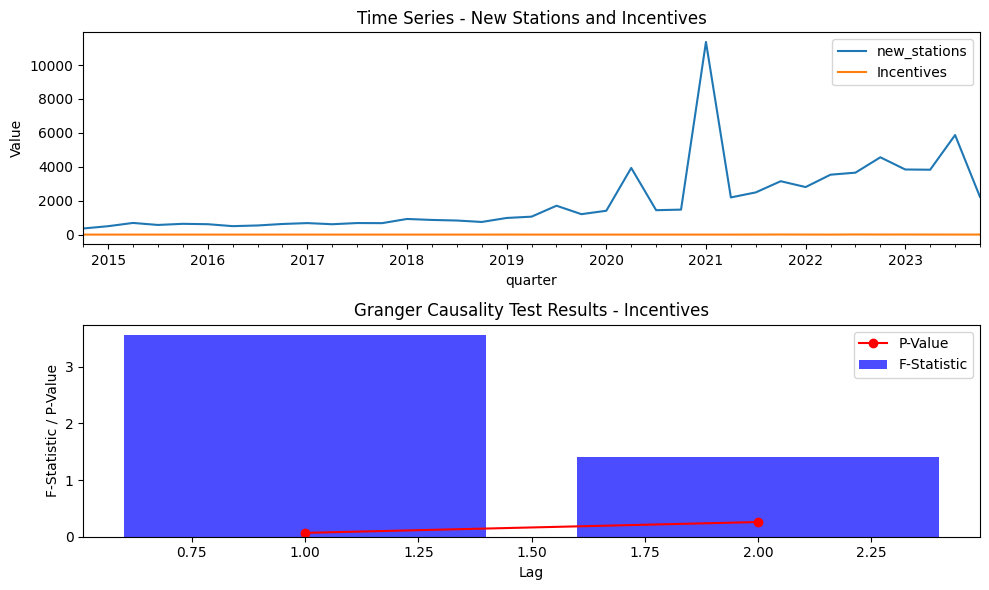


Granger Causality test for Laws and Regulations:


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


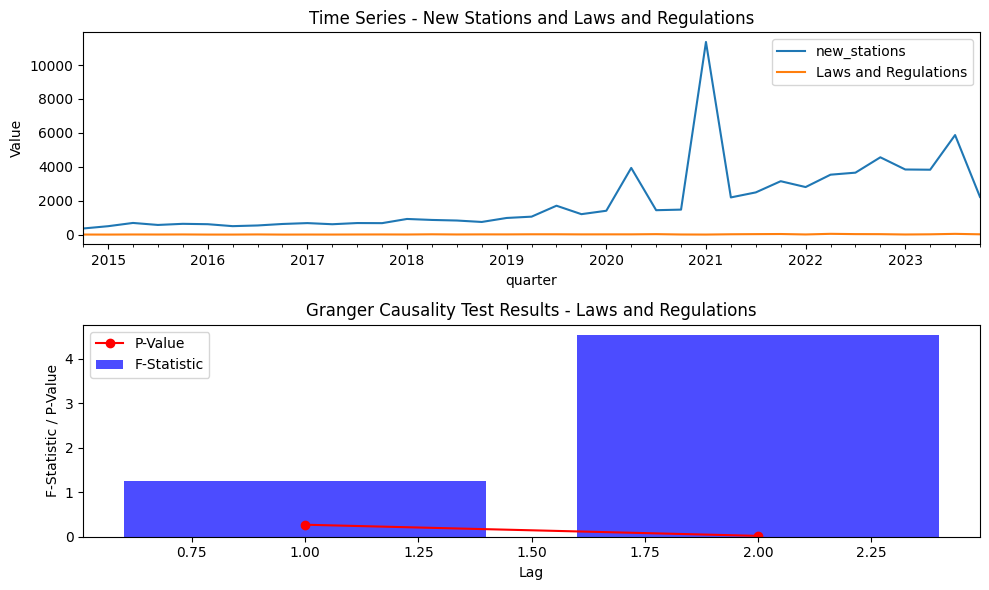


Granger Causality test for State Incentives:


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


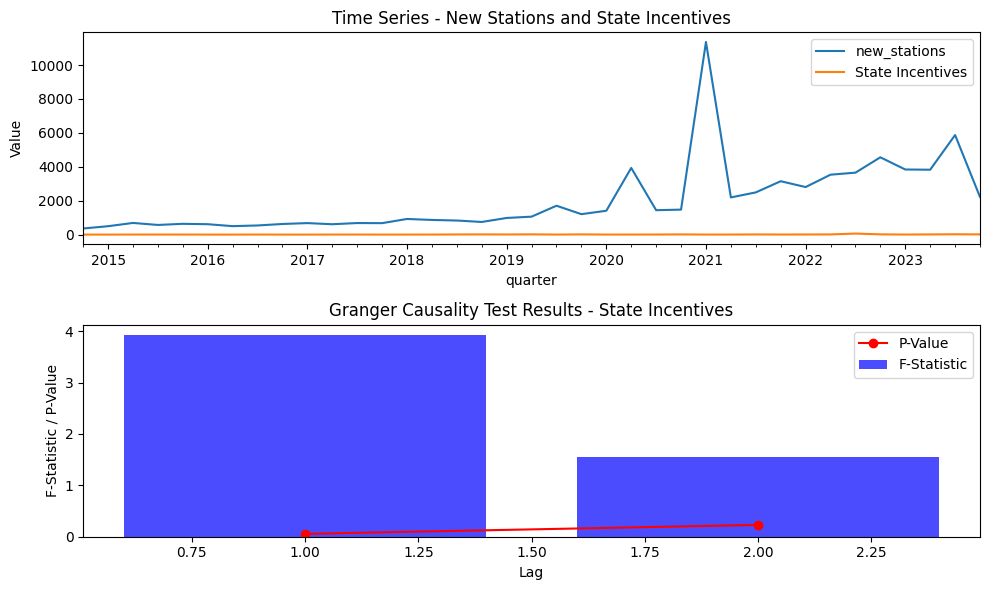


Granger Causality test for Utility / Private Incentives:


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


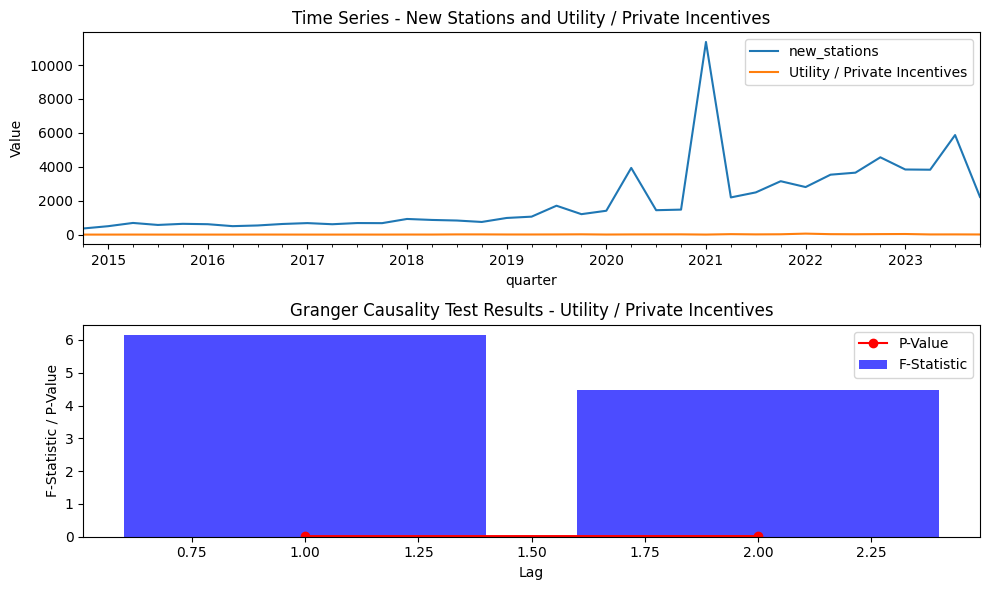

In [ ]:
for policy_type in policy_by_quarter.columns:
    if policy_type in merged_data.columns:  # Check if policy_type is in the merged data
        print(f"\nGranger Causality test for {policy_type}:")

        # Granger causality test
        granger_test_result = grangercausalitytests(merged_data[['new_stations', policy_type]], maxlag=2, verbose=False)

        fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 6))

        merged_data[['new_stations', policy_type]].plot(ax=axes[0])
        axes[0].set_title(f'Time Series - New Stations and {policy_type}')
        axes[0].set_ylabel('Value')

        f_stats = [granger_test_result[i+1][0]['ssr_ftest'][0] for i in range(2)]
        p_values = [granger_test_result[i+1][0]['ssr_ftest'][1] for i in range(2)]

        axes[1].bar(x=np.arange(1, 3), height=f_stats, color='blue', alpha=0.7, label='F-Statistic')
        axes[1].plot(np.arange(1, 3), p_values, color='red', marker='o', label='P-Value')
        axes[1].set_title(f'Granger Causality Test Results - {policy_type}')
        axes[1].set_xlabel('Lag')
        axes[1].set_ylabel('F-Statistic / P-Value')
        axes[1].legend()

        plt.tight_layout()
        plt.show()
    else:
        print(f"\nPolicy type '{policy_type}' not found in merged data.")

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print resul

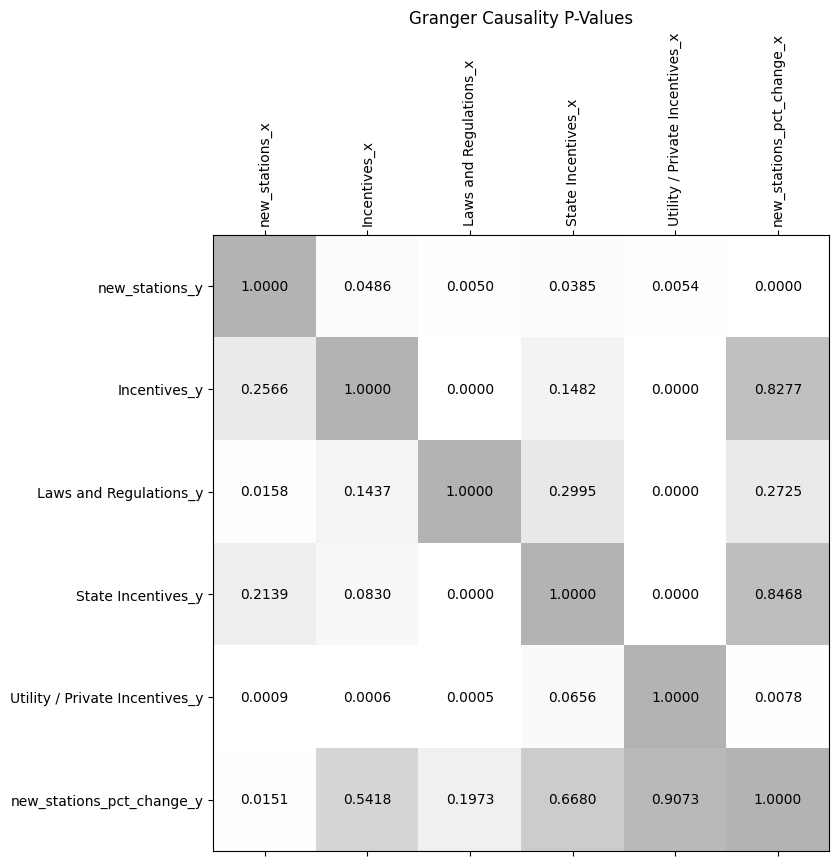

In [ ]:
from statsmodels.tsa.stattools import grangercausalitytests
import pandas as pd
import numpy as np

merged_data.head(10)

def granger_causality_matrix(data, variables, maxlag=2):
    """Check Granger Causality of all possible combinations of the provided time series.
    The rows are the response variable, columns are predictors."""
    dataframe = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in dataframe.columns:
        for r in dataframe.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i + 1][0]['ssr_chi2test'][1], 4) for i in range(maxlag)]
            min_p_value = np.min(p_values)
            dataframe.loc[r, c] = min_p_value
    dataframe.columns = [var + '_x' for var in variables]
    dataframe.index = [var + '_y' for var in variables]
    return dataframe

variables = merged_data.columns  # List of time series variables
granger_df = granger_causality_matrix(merged_data, variables, maxlag=2)


'''
# Display the Granger causality matrix as a table
print(granger_df)

# Display the Granger causality matrix
sns.heatmap(granger_df, annot=True, cmap='coolwarm', mask=(granger_df >= 0.05))
plt.title('Granger Causality Matrix')
plt.show()
'''

fig, ax = plt.subplots(figsize=(10, 8))
ax.matshow(granger_df, cmap='binary', alpha=0.3)
for (i, j), val in np.ndenumerate(granger_df):
    ax.text(j, i, f'{val:.4f}', ha='center', va='center')

plt.xticks(ticks=np.arange(granger_df.shape[1]), labels=granger_df.columns, rotation=90)
plt.yticks(ticks=np.arange(granger_df.shape[0]), labels=granger_df.index)
plt.title('Granger Causality P-Values')
plt.show()


In [ ]:
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import coint

def cointegration_test(df, alpha=0.05):
    p_value_matrix = pd.DataFrame(np.ones((len(df.columns), len(df.columns))), index=df.columns, columns=df.columns)
    for col in df.columns:
        for row in df.columns:
            if col != row:
                _, p_value, _ = coint(df[col], df[row])
                p_value_matrix.loc[row, col] = p_value
    return p_value_matrix


# Cointegration test
print("Cointegration Test Results:")
coint_matrix = cointegration_test(merged_data)
print(coint_matrix)

Cointegration Test Results:
                              new_stations  Incentives  Laws and Regulations  \
new_stations                      1.000000    0.936176              0.000235   
Incentives                        0.000078    1.000000              0.844542   
Laws and Regulations              0.000073    0.000917              1.000000   
State Incentives                  0.704585    0.017976              0.960550   
Utility / Private Incentives      0.000015    0.058695              0.896233   
new_stations_pct_change           0.706499    0.891730              0.956085   

                              State Incentives  Utility / Private Incentives  \
new_stations                      5.816009e-05                      0.001848   
Incentives                        1.191277e-05                      0.669708   
Laws and Regulations              1.759479e-08                      0.908154   
State Incentives                  1.000000e+00                      0.723179   
Utility / P

In [ ]:
model = VAR(merged_data)
for i in [1,2,3,4]:
    result = model.fit(i)
    print('Lag Order =', i)
    print('AIC : ', result.aic)
    print('BIC : ', result.bic)
    print('FPE : ', result.fpe)
    print('HQIC: ', result.hqic, '\n')



# Optimal lag = 4
optimal_lag = 4
var_model = model.fit(optimal_lag)

# Forecast
forecasted_values = var_model.forecast(merged_data.values[-optimal_lag:], 5)


forecasted_df = pd.DataFrame(forecasted_values, columns=merged_data.columns)


print("\nVAR Forecasted Values:")
print(forecasted_df)


Lag Order = 1
AIC :  34.34619146678325
BIC :  36.19363022831538
FPE :  850022425233420.1
HQIC:  34.99099707658266 

Lag Order = 2
AIC :  31.875845617948038
BIC :  35.342049869267306
FPE :  87237387099988.67
HQIC:  33.07237883807679 

Lag Order = 3
AIC :  29.109564614205098
BIC :  34.22736166732987
FPE :  10444874922148.75
HQIC:  30.854879978330572 

Lag Order = 4
AIC :  24.502302435649632
BIC :  31.304609533224543
FPE :  716326680790.3322
HQIC:  26.791071806022558 


VAR Forecasted Values:
   new_stations  Incentives  Laws and Regulations  State Incentives  \
0  27197.549538    3.146951           -152.917410         35.543305   
1  35502.491072   -3.869432            -77.598525        -78.309154   
2 -11909.136869   -0.676313            113.280382        -33.516761   
3 -17716.343012   16.818029             18.006334         22.646435   
4  41819.006035   10.553189           -158.741632        -65.197067   

   Utility / Private Incentives  new_stations_pct_change  
0                  